
AUTOLIB CAR SHARING ANALYSIS


##Analysis definition

In this project you will be working as a data scientist working for an electric car-sharing service company. You have been tasked to process stations data to understand electric car usage over time by solving for the following research question

##Research Question

Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.

##Additional Questions

What is the most popular hour for returning cars?
What station is the most popular?
Overall?
At the most popular picking hour?
What postal code is the most popular for picking up Blue cars? Does the most popular station belong to that postal code?
Overall?
At the most popular picking hour?
Do the results change if you consider Utilib and Utilib 1.4 instead of Blue cars? 

##Importing our Libraries



In [ ]:
#importing the libraries that we will need for this analysis
import pandas as pd

import numpy as np

import seaborn as sns

from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats


##Loading our datasets

In [ ]:
#A dataset has been provided in csv format which will be imported from device


autolib_data = pd.read_csv('Autolib_dataset.csv', header=0, index_col=False)

autolib_data


,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,NaN,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,NaN,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,NaN,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,NaN,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,NaN,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,NaN,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,NaN,3,station,ok,nonexistent,2018,4,4,17,27


In [ ]:
#previewing our dataset
autolib_data.head(10)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,NaN,paris-voltaire-8,STATION,"48.8657658, 2.3664376",75011,Paris/Voltaire/8,operational,NaN,4,station,ok,nonexistent,2018,4,6,7,2
6,37 rue Leblanc,0,0,0,0,0,nonexistent,Paris,"Station en parking (niv -1), accÃ¨s 37 rue Leb...",paris-citroencevennes-parking,PARKING,"48.83874, 2.27641",75015,Paris/CitroÃ«n CÃ©vennes/Parking,broken,NaN,0,station,closed,nonexistent,2018,4,8,18,20
7,17 Rue des Luaps ProlongÃ©e,3,3,1,0,0,nonexistent,Nanterre,NaN,nanterre-luaps-17,STATION,"48.88069, 2.21063",92000,Nanterre/Luaps/17,operational,NaN,0,station,ok,nonexistent,2018,4,4,22,13
8,34 avenue Jean Moulin,1,1,0,0,0,nonexistent,Paris,NaN,paris-jeanmoulin-34,STATION,"48.8266807, 2.3237355",75014,Paris/Jean Moulin/34,operational,NaN,4,station,ok,nonexistent,2018,4,2,22,58
9,41 boulevard de Rochechouart,6,6,0,0,0,nonexistent,Paris,NaN,paris-anvers-parking,PARKING,"48.88267, 2.34405",75009,Paris/Anvers/Parking,operational,NaN,0,station,ok,nonexistent,2018,4,4,15,2


##Exploration

In [ ]:
#Checking the information for the dataset
##
autolib_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

In [ ]:
#Shape of the dataset
autolib_data.shape

(5000, 25)

In [ ]:
#Checking for missing values and Nan
autolib_data.isnull().sum()

Address                   0
Cars                      0
Bluecar counter           0
Utilib counter            0
Utilib 1.4 counter        0
Charge Slots              0
Charging Status           0
City                      0
Displayed comment      4889
ID                        0
Kind                      0
Geo point                 0
Postal code               0
Public name               0
Rental status             0
Scheduled at           4953
Slots                     0
Station type              0
Status                    0
Subscription status       0
year                      0
month                     0
day                       0
hour                      0
minute                    0
dtype: int64

Data Cleaning

In [ ]:
df = autolib_data.columns.str.capitalize()
df
#df = map(str.capitalize,df)
#columns = ['Year','Month','Day','Hour','Minute']
#df = columns
#df


Index(['Address', 'Cars', 'Bluecar counter', 'Utilib counter',
       'Utilib 1.4 counter', 'Charge slots', 'Charging status', 'City',
       'Displayed comment', 'Id', 'Kind', 'Geo point', 'Postal code',
       'Public name', 'Rental status', 'Scheduled at', 'Slots', 'Station type',
       'Status', 'Subscription status', 'Year', 'Month', 'Day', 'Hour',
       'Minute'],
      dtype='object')

In [ ]:
# Dropping irrelevant columns
#Dropping the Scheduled at and Displayed comments column as it contains most null values

new_dataframe = autolib_data.drop(['Scheduled at','Displayed comment'], axis=1)
new_dataframe

#ignore#data = autolib_data.drop(autolib_data.loc[autolib_data.index==8].index)
#data.info()


,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,3,station,ok,nonexistent,2018,4,4,17,27


In [ ]:
#Confirming there are no null values
new_dataframe.isnull().sum()

Address                0
Cars                   0
Bluecar counter        0
Utilib counter         0
Utilib 1.4 counter     0
Charge Slots           0
Charging Status        0
City                   0
ID                     0
Kind                   0
Geo point              0
Postal code            0
Public name            0
Rental status          0
Slots                  0
Station type           0
Status                 0
Subscription status    0
year                   0
month                  0
day                    0
hour                   0
minute                 0
dtype: int64

In [ ]:
#Filtering based on the conditions given; City under analysis is paris
paris_dataframe = new_dataframe[new_dataframe['City']== 'Paris']

paris_dataframe   


,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23
5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,paris-voltaire-8,STATION,"48.8657658, 2.3664376",75011,Paris/Voltaire/8,operational,4,station,ok,nonexistent,2018,4,6,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,3 avenue d'Ivry,0,0,0,0,2,operational,Paris,paris-ivry-3,STATION,"48.82175, 2.36868",75013,Paris/Ivry/3,operational,6,station,ok,nonexistent,2018,4,9,23,1
4994,15 rue de Rocroy,0,0,0,0,0,operational,Paris,paris-rocroy-15,STATION,"48.8801236, 2.3509617",75010,Paris/Rocroy/15,operational,1,station,ok,nonexistent,2018,4,1,20,49
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,4,station,ok,nonexistent,2018,4,1,7,1


In [ ]:
##Checking information for the new data
paris_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2816 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              2816 non-null   object
 1   Cars                 2816 non-null   int64 
 2   Bluecar counter      2816 non-null   int64 
 3   Utilib counter       2816 non-null   int64 
 4   Utilib 1.4 counter   2816 non-null   int64 
 5   Charge Slots         2816 non-null   int64 
 6   Charging Status      2816 non-null   object
 7   City                 2816 non-null   object
 8   ID                   2816 non-null   object
 9   Kind                 2816 non-null   object
 10  Geo point            2816 non-null   object
 11  Postal code          2816 non-null   int64 
 12  Public name          2816 non-null   object
 13  Rental status        2816 non-null   object
 14  Slots                2816 non-null   int64 
 15  Station type         2816 non-null   object
 16  Status

Data Analysis

Text(0, 0.5, 'hour')

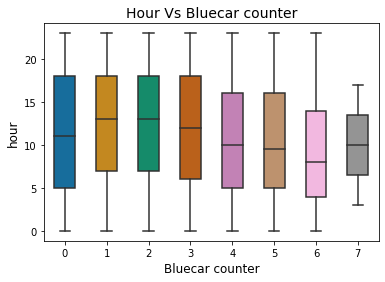

In [116]:
#Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.


#pop_hour = paris_dataframe.groupby('hour'), ['Bluecar counter'].count()

#pop_hour =paris_dataframe.groupby("hour")["Bluecar counter"].count().sort_values(ascending=True)
#pop_hour


bplot = sns.boxplot(y='hour', x='Bluecar counter', data=paris_dataframe, width=0.5, palette="colorblind")
#bplot=sns.stripplot(y='hour', x='Bluecar counter',  data=paris_dataframe, jitter=True, marker='o', alpha=0.5, color='black')

bplot.axes.set_title("Hour Vs Bluecar counter", fontsize=14)
bplot.set_xlabel("Bluecar counter", fontsize=12)
bplot.set_ylabel("hour", fontsize=12)


#paris_dataframe.boxplot(column =['hour'], by ='Bluecar counter', grid = False)




In [ ]:
#What is the most popular hour for returning cars?
#This is the hour when most cars at the station are 7

#ret = paris_dataframe['Bluecar counter']==7
#ret
#
#ret_hour =ret.groupby("hour")["Bluecar counter"]
#ret_hour
ret_hour =paris_dataframe.groupby("hour")["Bluecar counter"].count().sort_values(ascending=False)
ret_hour

hour
21    147
8     128
16    128
3     125
6     124
2     123
9     122
7     121
10    121
12    120
5     117
17    116
23    116
13    114
19    114
4     112
15    111
18    111
20    111
0     110
14    107
11    107
22    106
1     105
Name: Bluecar counter, dtype: int64

In [ ]:
#What postal code is the most popular for picking up Blue cars? Does the most popular station belong to that postal code?


pop_code = paris_dataframe.groupby('Postal code')['Bluecar counter'].count().sort_values(ascending=False)
pop_code
#popular postal code is 75015



Postal code
75015    274
75016    236
75017    221
75011    180
75020    169
75012    168
75013    168
75008    167
75019    158
75014    154
75018    141
75010    117
75007    111
75009    106
75006     94
75005     90
75004     68
75003     67
75002     61
75001     55
75112      6
75116      5
Name: Bluecar counter, dtype: int64

In [ ]:
pop_code_overall = paris_dataframe.groupby(['Postal code','Utilib counter', 'Utilib 1.4 counter'])['Bluecar counter'].count().sort_values(ascending=False)
#pop_code_overall is 75015
#At the most popular picking hour?
#Do the results change if you consider Utilib and Utilib 1.4 instead of Blue cars? 

Postal code  Utilib counter  Utilib 1.4 counter
75015        0               0                     231
75016        0               0                     194
75017        0               0                     174
75011        0               0                     162
75008        0               0                     152
                                                  ... 
75014        2               0                       1
75018        0               2                       1
75014        0               2                       1
75017        1               2                       1
75009        2               0                       1
Name: Bluecar counter, Length: 91, dtype: int64